In [37]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt

#PS: Pressure, bar, 100 Hz --> 100 Messungen pro Skeunde
#EPS: Motor power, W, 100 Hz
#FS: Volume flow, l/min, 10 Hz --> 10 Messungen pro Sekunde
#TS: Temperature, Celsius, 1 Hz --> 1 Messung pro Sekunde
#VS: Vibration, mm/s, 1Hz
#CE: Cooling efficiency (virtual), %, 1 Hz
#CP: Cooling power (virtual), kW, 1 Hz
#SE: Efficency factor, %, 1 Hz


input_path = "input_data/"
file_names = [
    "ce", "cp", "eps1", "se", "vs1", 
    "fs1", "fs2", 
    "ps1", "ps2", "ps3", "ps4", "ps5", "ps6",
    "ts1", "ts2", "ts3", "ts4", "target"
]

data = {}

for file_name in file_names:
    data[file_name] = loadtxt(f"{input_path}{file_name}.txt")

In [38]:
for file_name in file_names:
    print(f"Shape of {file_name}:{data[file_name].shape}")

Shape of ce:(2205, 60)
Shape of cp:(2205, 60)
Shape of eps1:(2205, 6000)
Shape of se:(2205, 60)
Shape of vs1:(2205, 60)
Shape of fs1:(2205, 600)
Shape of fs2:(2205, 600)
Shape of ps1:(2205, 6000)
Shape of ps2:(2205, 6000)
Shape of ps3:(2205, 6000)
Shape of ps4:(2205, 6000)
Shape of ps5:(2205, 6000)
Shape of ps6:(2205, 6000)
Shape of ts1:(2205, 60)
Shape of ts2:(2205, 60)
Shape of ts3:(2205, 60)
Shape of ts4:(2205, 60)
Shape of target:(2205, 5)


In [39]:
df_target = pd.DataFrame(data['target'], columns=['Cooler_Condition',
                                         'Valve_Condition',
                                         'Internal_Pump_Leakage',
                                         'Hydraulic_Accumulator',
                                         'Stable_Flag'])
df_target = df_target['Valve_Condition']

#df_target.head()

In [40]:
df_target.describe()

count    2205.000000
mean       90.693878
std        10.681802
min        73.000000
25%        80.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Valve_Condition, dtype: float64

In [41]:
del data['target']

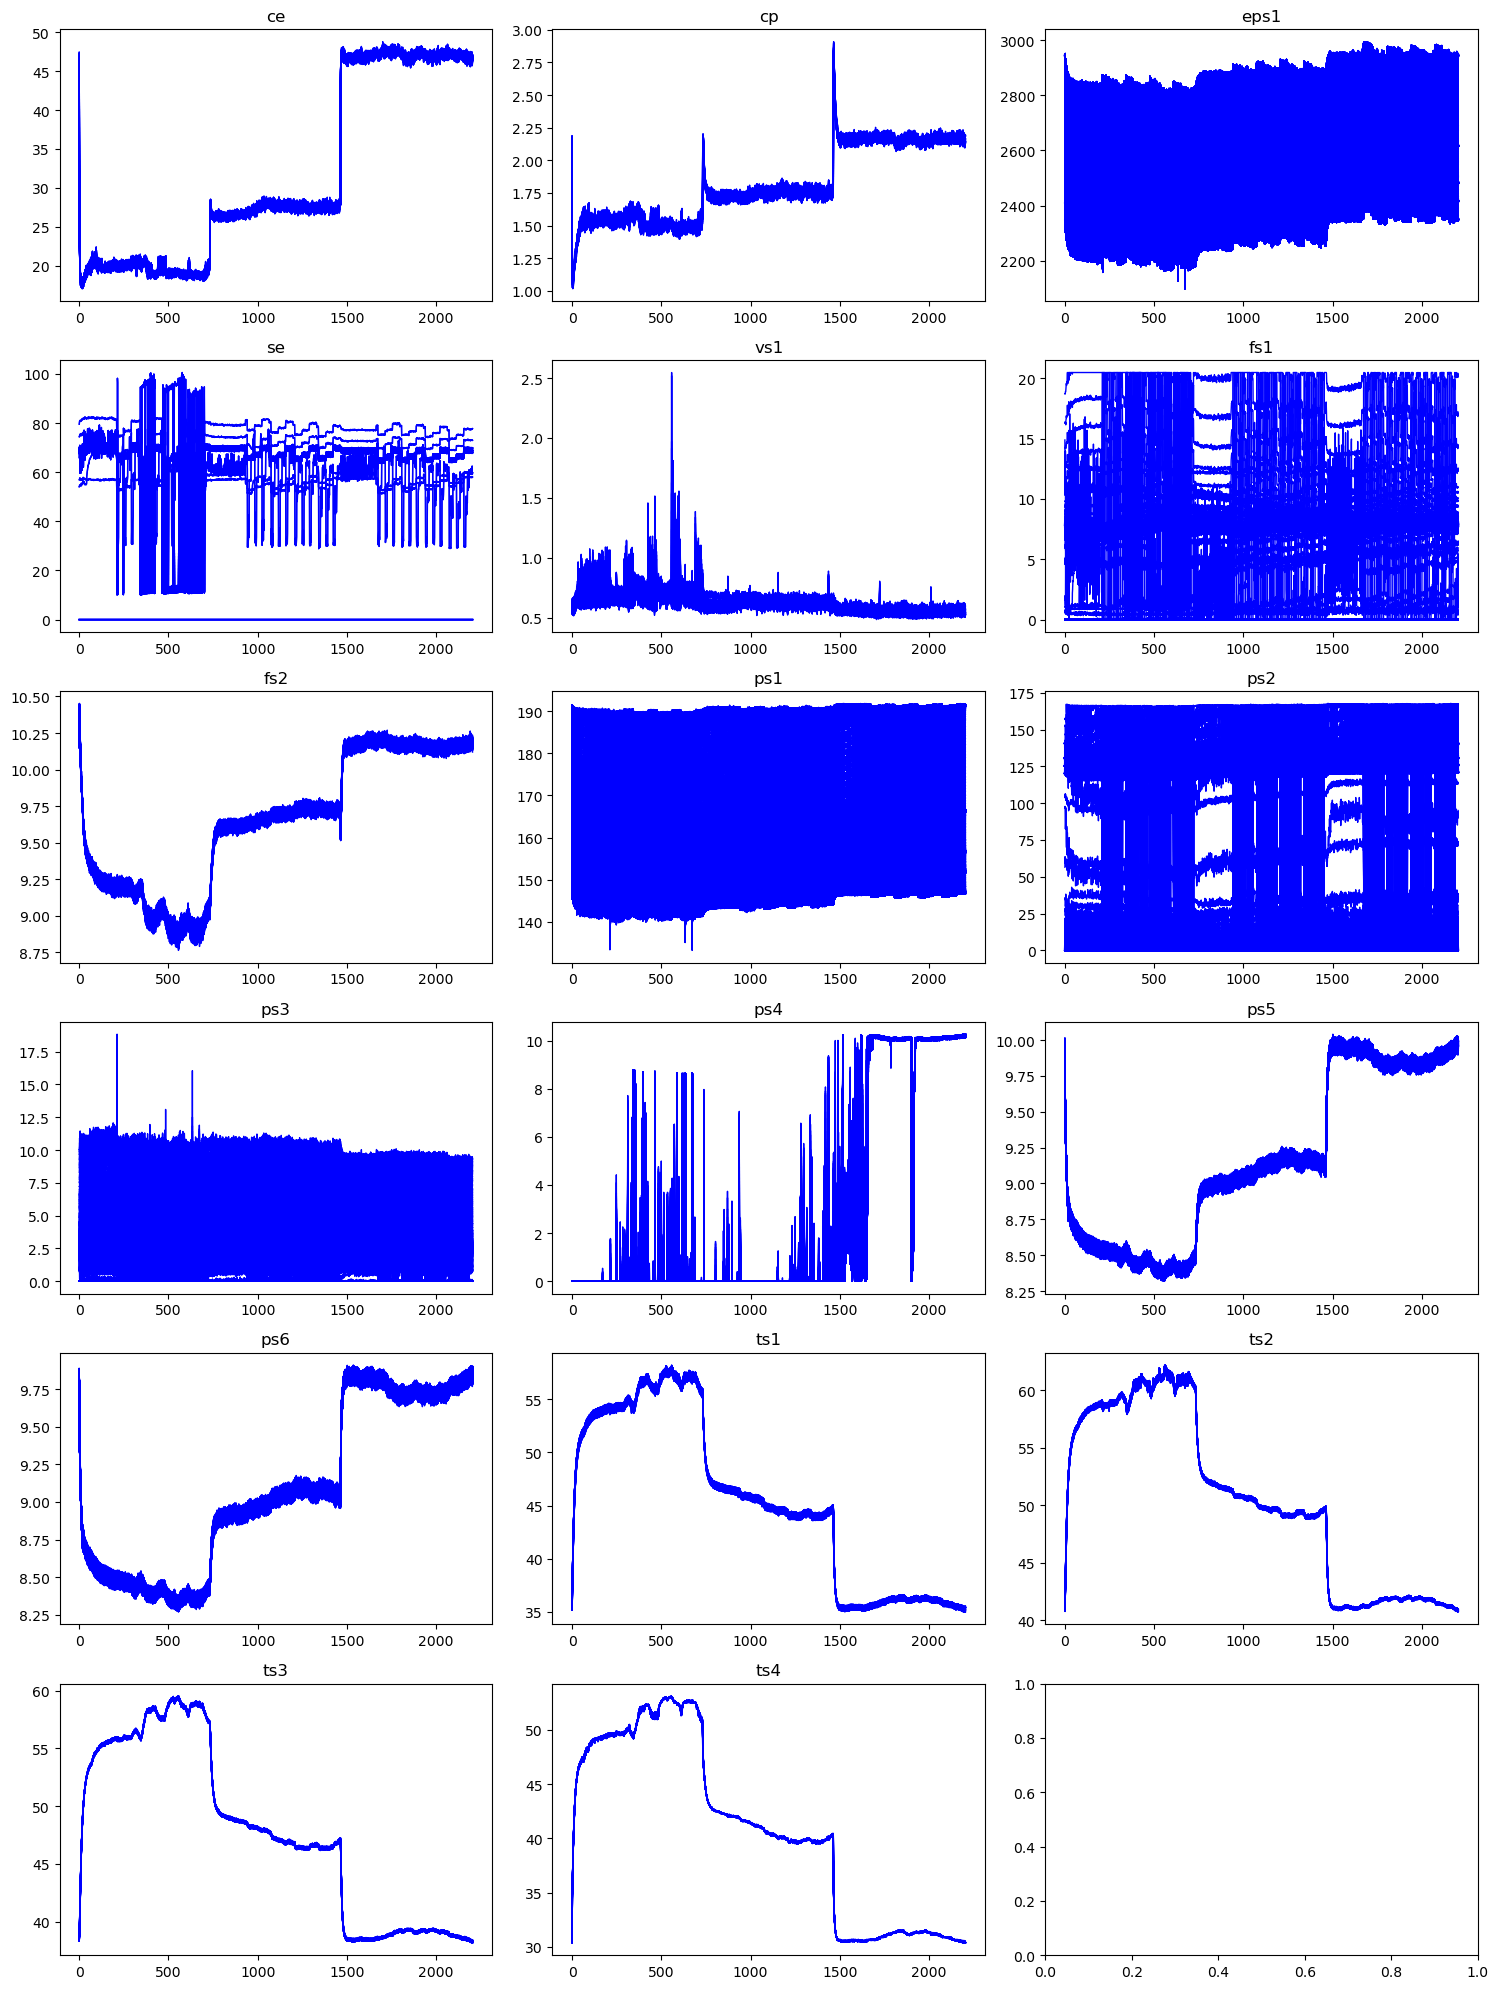

In [44]:
# Erzeuge 18 Subplots
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
axes = axes.flatten()  


for i, key in enumerate(data):
    ax = axes[i]
    ax.plot(data[key], color = 'blue', linewidth = 1) 
    ax.set_title(key) 

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

In [4]:
for key, array in data.items():
    print(f"{key}: Mean = {round((np.mean(array)),4)}, Std = {round((np.std(array)),4)}, Min = {np.min(array)}, Max = {np.max(array)}")


ce: Mean = 31.2991, Std = 11.5779, Min = 17.042, Max = 48.777
cp: Mean = 1.8084, Std = 0.2793, Min = 1.016, Max = 2.909
eps1: Mean = 2495.5092, Std = 218.2222, Min = 2097.8, Max = 2995.2
se: Mean = 55.2879, Std = 25.6422, Min = 0.0, Max = 100.6
vs1: Mean = 0.6133, Std = 0.0805, Min = 0.483, Max = 2.546
fs1: Mean = 6.1985, Std = 3.2138, Min = 0.0, Max = 20.479
fs2: Mean = 9.6495, Std = 0.4495, Min = 8.764, Max = 10.453
ps1: Mean = 160.4853, Std = 16.1333, Min = 133.13, Max = 191.92
ps2: Mean = 109.3799, Std = 48.1032, Min = 0.0, Max = 167.77
ps3: Mean = 1.7532, Std = 0.9347, Min = 0.0, Max = 18.828
ps4: Mean = 2.6003, Std = 4.2976, Min = 0.0, Max = 10.266
ps5: Mean = 9.1633, Std = 0.5766, Min = 8.318, Max = 10.041
ps6: Mean = 9.0794, Std = 0.5499, Min = 8.268, Max = 9.91
ts1: Mean = 45.4246, Std = 7.9925, Min = 34.984, Max = 58.207
ts2: Mean = 50.366, Std = 7.3956, Min = 40.707, Max = 62.176
ts3: Mean = 47.6621, Std = 7.4506, Min = 38.145, Max = 59.539
ts4: Mean = 40.7357, Std = 8.1063,

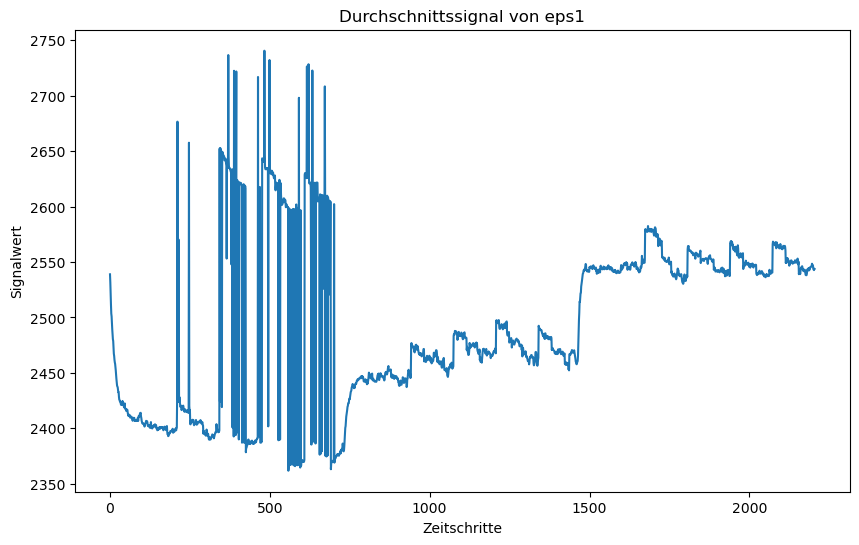

In [48]:
#Visualisierung eines Signals mit Durchschnittswert
mean_signal = np.mean(data["eps1"], axis=1)  # Durchschnitt über alle Spalten
plt.figure(figsize=(10, 6))
plt.plot(mean_signal)
plt.title("Durchschnittssignal von eps1")
plt.xlabel("Zeitschritte")
plt.ylabel("Signalwert")
plt.show()
